<a href="https://colab.research.google.com/github/ersimbu89/AIMLProjects/blob/master/BANK_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [483]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [484]:
# Read Dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [485]:
df = pd.read_csv("/content/drive/MyDrive/bank.csv")


In [486]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [487]:
#  RowNumber , CustomerID and Surname are unique for customer have no significances.
# So Dropping them using iloc
ds = df.iloc[:,3:14]
ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [488]:
# Get the column names, number of non-null values and data-type for each column
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [489]:
# We have 7 int variable, 2 float variable and 2 categorical feature. Need to covert Categorical feature to numeric feature
# Data types for features are appropriate and 10000 rows for all features. This indicates no null value or incorrect data entry

In [490]:
# Checking for Duplicate Values

ds.duplicated().sum()

0

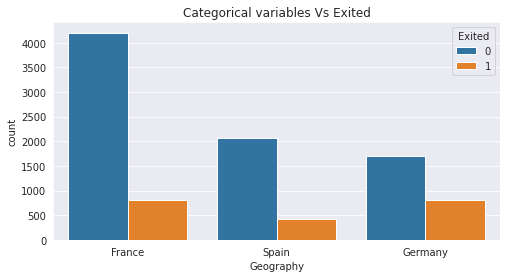

Exited            0         1
Geography                    
France     0.838452  0.161548
Germany    0.675568  0.324432
Spain      0.833266  0.166734 
------------------------------------------------------



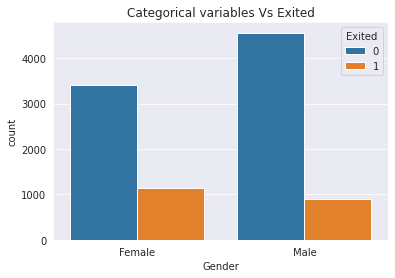

Exited         0         1
Gender                    
Female  0.749285  0.250715
Male    0.835441  0.164559 
------------------------------------------------------



In [491]:
# Bivariate Analysis - Categorical variable

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
plt.figure(figsize=(8,4))
sns.set_style("darkgrid")
for i in ds[['Geography','Gender']]:
    plt.title('Categorical variables Vs Exited')
    sns.countplot(ds[i],hue=ds['Exited'])
    plt.show()
    a=pd.crosstab(ds[i],ds['Exited'],normalize='index')
    print(a,'\n------------------------------------------------------\n')



In [492]:
# Inferences: 
# Female Cutomers are exited more than male
# Geograpy: Germany Customers are exited more than other geography

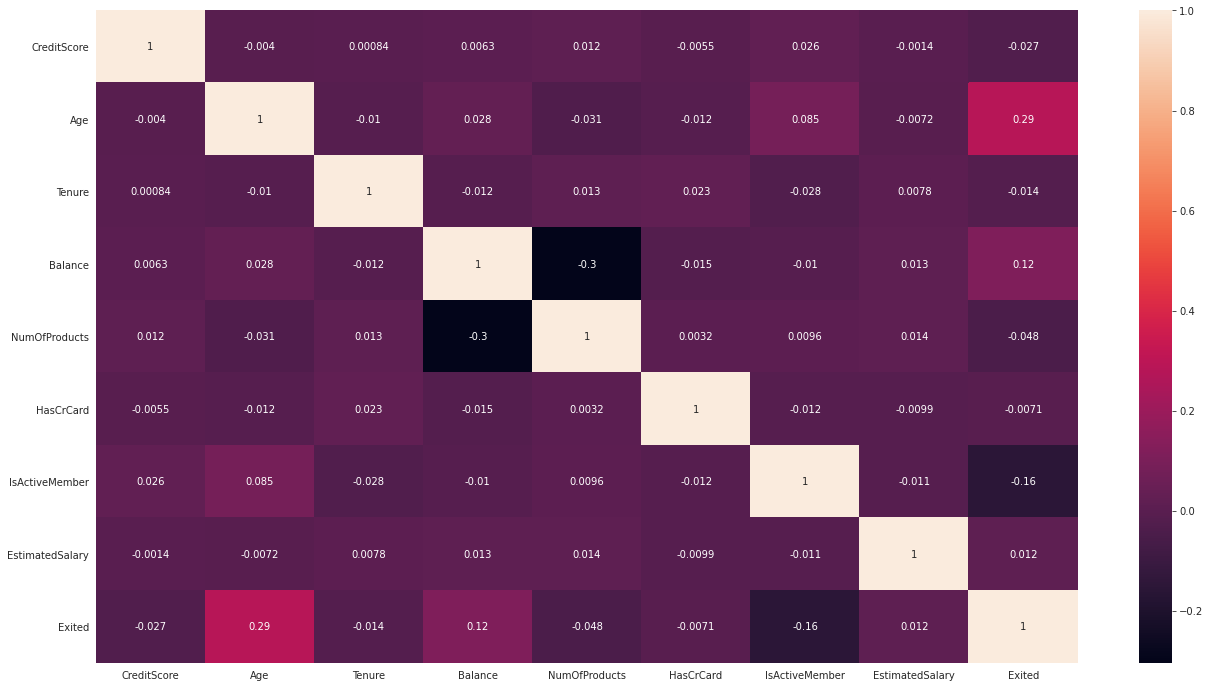

In [493]:
# Bivariate Analysis - Heatmap (Numerical Features)

plt.figure(figsize =(22,12))
sns.heatmap(ds.corr(), annot= True)
plt.show()

In [494]:
# Inference: There is no high correlation exist among features

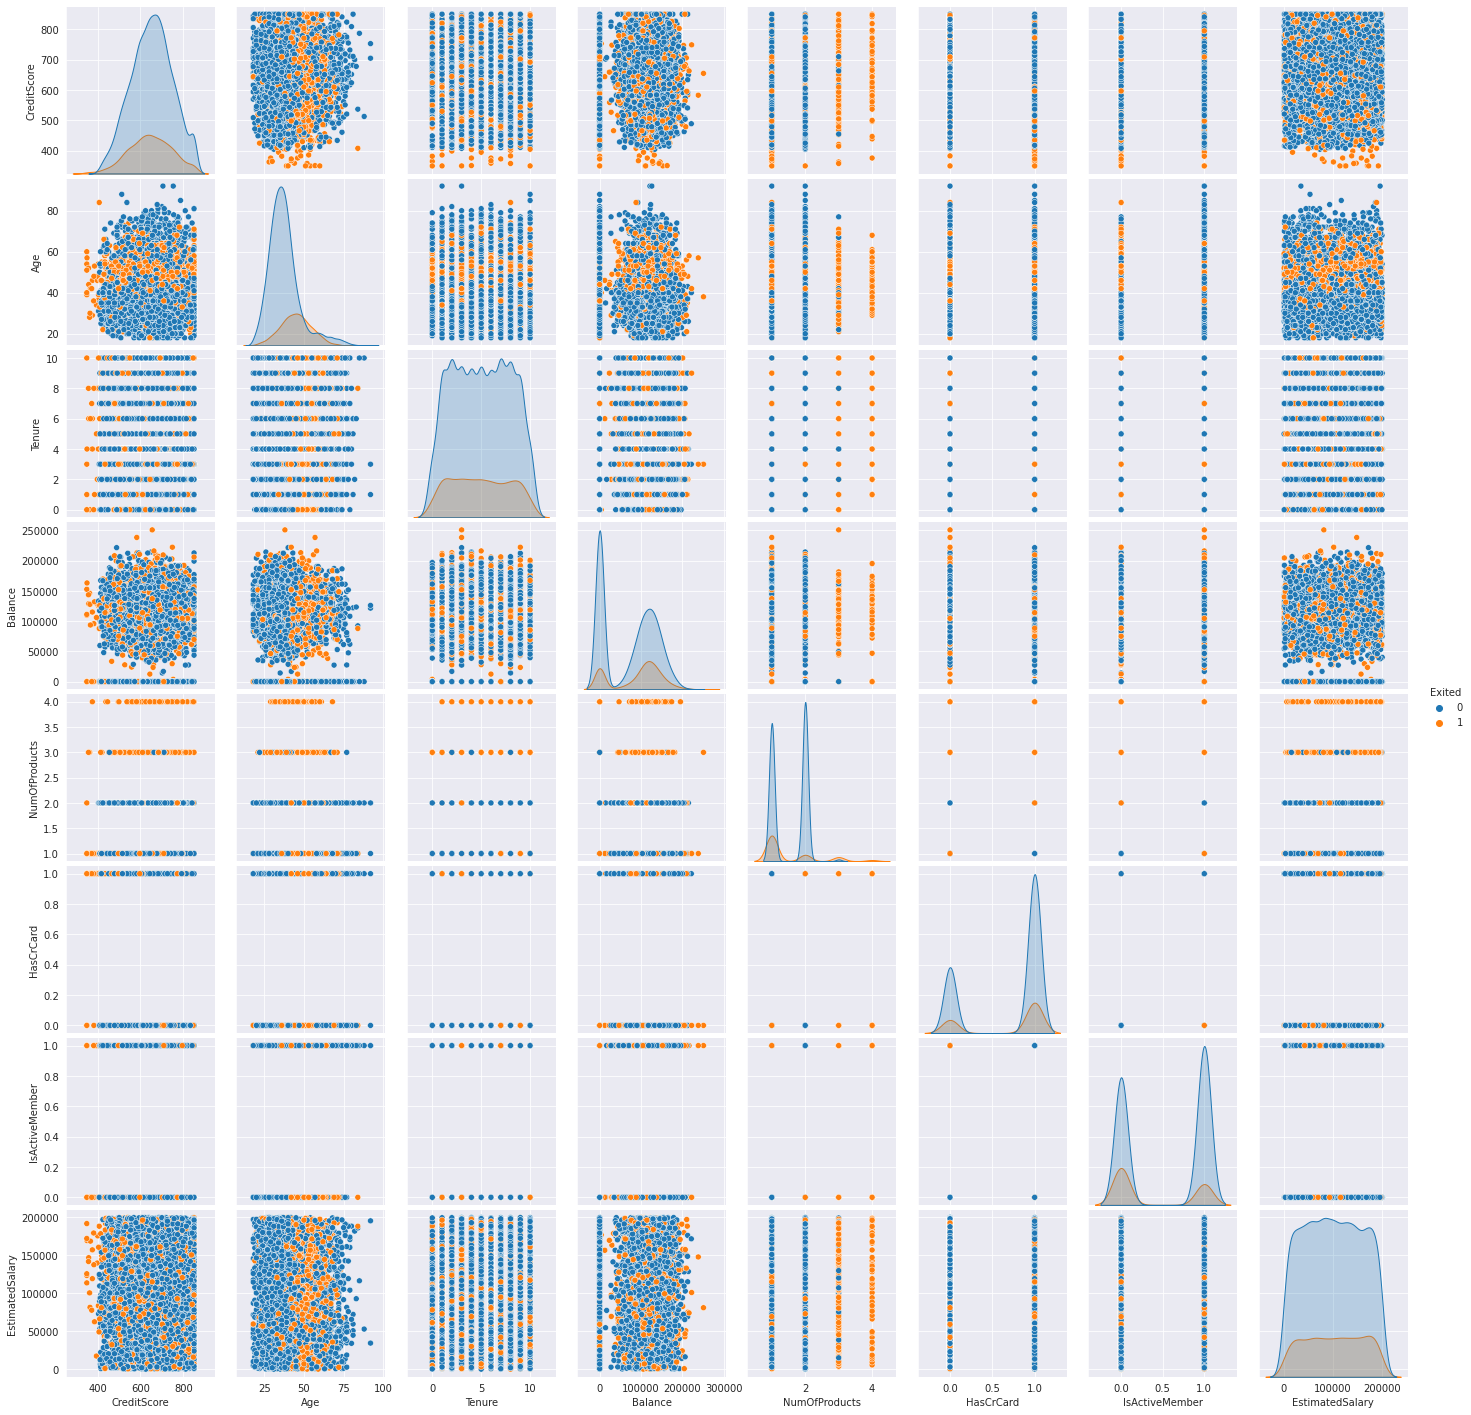

In [495]:
## pairplot

sns.pairplot(ds, diag_kind='kde',hue='Exited')
plt.show()

In [496]:
# Inference: Dataset is imbalanced and no significance relation

In [497]:
ds['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Distinguish the feature and target set

In [498]:
x=ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y=ds['Exited']           ## Exited

In [499]:
# Converting categorical features to Numerical features
X =pd.concat([pd.get_dummies(x['Gender'], drop_first =True, prefix='Gender'),
              pd.get_dummies(x['Geography'], drop_first=True, prefix ='Geography'),
              x.drop(['Gender', 'Geography'], axis =1)], axis =1)


In [500]:
X.head()

,Gender_Male,Geography_Germany,Geography_Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,0,0,619,42,2,0.00,1,1,1,101348.88
1,0,0,1,608,41,1,83807.86,1,0,1,112542.58
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57
3,0,0,0,699,39,1,0.00,2,0,0,93826.63
4,0,0,1,850,43,2,125510.82,1,1,1,79084.10


In [501]:
#Divide the data set into Train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [502]:
# Normalize the train and test data

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [503]:
# Initialize & build the model

# Initializing the ANN
classifier = Sequential()


In [504]:

# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 6.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(activation = 'relu', input_dim = 11, units=6, kernel_initializer='uniform'))

In [505]:
# Add hidden layer

classifier.add(Dense(6, activation='sigmoid', kernel_initializer='uniform'))

In [506]:
# Output layer. We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid', kernel_initializer='uniform'))

In [507]:
# Create optimizer with default learning rate
# Compile the model
classifier.compile(optimizer='SGD', loss='mse', metrics=['accuracy'])

In [508]:
classifier.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_61 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [509]:
classifier.fit(X_train, y_train,           
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.2239 - accuracy: 0.7966 - val_loss: 0.1822 - val_accuracy: 0.7975
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 0.7945 - val_loss: 0.1681 - val_accuracy: 0.7975
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.7985 - val_loss: 0.1641 - val_accuracy: 0.7975
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.1697 - accuracy: 0.7854 - val_loss: 0.1626 - val_accuracy: 0.7975
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.1656 - accuracy: 0.7916 - val_loss: 0.1620 - val_accuracy: 0.7975
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.7972 - val_loss: 0.1618 - val_accuracy: 0.7975
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.7973 - val_loss: 0.1616 - val_accuracy: 0.7975

In [510]:
# Predict the results using 0.5 as a threshold
y_pred = classifier.predict(X_test)
print(y_pred)

[[0.20427781]
 [0.20440757]
 [0.2039065 ]
 ...
 [0.20361757]
 [0.20447958]
 [0.20396683]]


In [511]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false. 
# So we will use the cutoff value 0.5 to indicate whether they are likely to exit or not.
y_pred = (y_pred > 0.5)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [512]:
# Print the Accuracy score and confusion matrix

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred)
print(cm1)


[[1595    0]
 [ 405    0]]


This confusion matrix shows that this model is dummy model and it is just predicting positive class, whatever the class data point belong to. This happens due to imbalanced dataset and incorrect loss function. 

**Optimize the model**

1. Activation function: using Relu for hidden layer and Sigmoid for output layer
2. Type of optimization / backpropagation technique to use: Lets try Adam
3. Loss: binary_crossentropy. This is the loss function used within adam. This should be the logarthmic loss

Rebuilding the model using these optimised parameters

In [513]:


# Initializing the ANN
classifier = Sequential()

In [514]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
#kernel_initializer - randomly initialize the weight with small numbers close to zero, according to uniform distribution
#units should be the average of nodes in the input layer (11 nodes) and the number of nodes in the output layer (1 node). For this case is 11+1/2 = 6
# Activation function =Relu is most commonly used activation function for hidden layers

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11 ))

In [515]:
# Adding hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

In [516]:
# Adding the output layer
# Sigmoid activation function is used
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [517]:
# Compiling the ANN with loss function = Adam
classifier.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=["accuracy"])

In [518]:
classifier.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_64 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [519]:
classifier.fit(X_train, y_train,           
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=10)
#batch_size : number of observations after which we update the weights
# epochs: How many times you train your model

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.6784 - accuracy: 0.6323 - val_loss: 0.4816 - val_accuracy: 0.8000
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4675 - accuracy: 0.8025 - val_loss: 0.4428 - val_accuracy: 0.8050
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4583 - accuracy: 0.8041 - val_loss: 0.4212 - val_accuracy: 0.8200
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4302 - accuracy: 0.8070 - val_loss: 0.4100 - val_accuracy: 0.8240
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4251 - accuracy: 0.8122 - val_loss: 0.3972 - val_accuracy: 0.8360
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4117 - accuracy: 0.8195 - val_loss: 0.3836 - val_accuracy: 0.8460
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3783 - accuracy: 0.8387 - val_loss: 0.3644 - val_accuracy: 0.8560

In [520]:
#Predict the results using 0.5 as a threshold

In [521]:
y_pred = classifier.predict(X_test)
print(y_pred)

[[0.3192252 ]
 [0.2659828 ]
 [0.10459891]
 ...
 [0.14995515]
 [0.15710628]
 [0.32557762]]


In [522]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false. 
# So we will use the cutoff value 0.5 to indicate whether they are likely to exit or not.
y_pred = (y_pred > 0.5)
print(y_pred[0:7])

[[False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]]


In [523]:
# According to our model the first five customer will not leave the bank while the sixth on the rank will.

In [524]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)



[[1529   66]
 [ 198  207]]


In [525]:
accuracy_model = ((cm[0][0]+cm[1][1])*100)/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print (accuracy_model, '% of Bank customer data was classified correctly')

86.8 % of Bank customer data was classified correctly


Neural network based classifier  model determines 86.8% correctly about whether customer will leave or not in the next 6 months.